# <center>Using SQLite for a data warehouse</center>

### Author:  Bryan Cafferky  - For Demonstration Purposes Only

### Not intended for production use. 

## Documentation at: https://docs.python.org/3/library/sqlite3.html

# Create or Point to Our SQLite database...

### 1)  Load the SQLite package...

In [1]:
import sqlite3

print(sqlite3.version)
print(sqlite3.sqlite_version)

2.6.0
3.32.3


### 2) Connect to the database.  

In [2]:
slconn = sqlite3.connect('aw_eda.db') # permanent database

In [3]:
print(slconn)

### 3)  Create a cursor to execute statements to SQLite.

In [5]:
cursor = slconn.cursor()

In [6]:
cursor

# Get Data from database management systems...

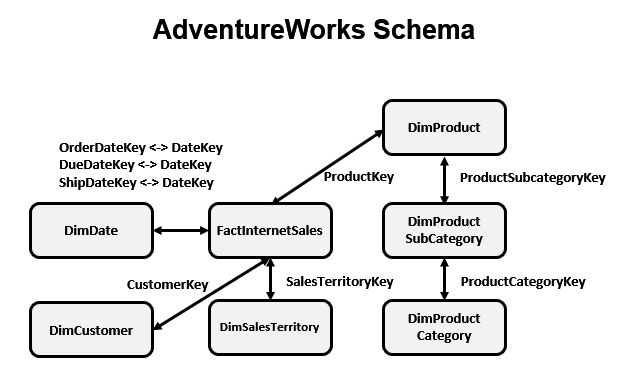

### Load our simple SQLDB class from dbutils module...

In [7]:
from dbutils.dbaccess import SQLDB

### Define the SQL Server name...

In [8]:
sqlservername = 'DESKTOP-TG2VLSU\SQL2017'

### Create a SQL query to execute...

### Create the SQLDB object pointing to the SQL Server...

#### We only need to override the constructor parameters that differ from what we need.
#### Below we use the default of integrated security.
#### Parameters: Server, Integrated Security (True/False), Driver, Database

In [9]:
aw_sql_is = SQLDB(sqlservername, True, '{ODBC Driver 13 for SQL Server}', 'AdventureWorksDW2017')

#### Once the SQLDB object is created, you can run queries with just the SQL statement.
#### It stores the connection string information in the object instance. 

##### Directly run the query...

In [10]:
aw_sql_is.get_db_data('select top 2 * from dbo.DimProduct')

ProductKey ProductAlternateKey ProductSubcategoryKey WeightUnitMeasureCode  \
0           1             AR-5381                  None                  None   
1           2             BA-8327                  None                  None   

  SizeUnitMeasureCode EnglishProductName SpanishProductName FrenchProductName  \
0                None    Adjustable Race                                        
1                None       Bearing Ball                                        

  StandardCost  FinishedGoodsFlag  ... ChineseDescription  ArabicDescription  \
0         None              False  ...               None               None   
1         None              False  ...               None               None   

   HebrewDescription ThaiDescription GermanDescription JapaneseDescription  \
0               None            None              None                None   
1               None            None              None                None   

  TurkishDescription  StartDate EndDate   Status  
0               None 2003-07-01    None  Current  
1               None 2003-07-01    None  Current  

[2 rows x 36 columns]

##### Or store the query results to a dataframe...

In [11]:
dfproduct = aw_sql_is.get_db_data('select top 5 * from dimproduct')
dfproduct.head()

ProductKey ProductAlternateKey ProductSubcategoryKey WeightUnitMeasureCode  \
0           1             AR-5381                  None                  None   
1           2             BA-8327                  None                  None   
2           3             BE-2349                  None                  None   
3           4             BE-2908                  None                  None   
4           5             BL-2036                  None                  None   

  SizeUnitMeasureCode     EnglishProductName SpanishProductName  \
0                None        Adjustable Race                      
1                None           Bearing Ball                      
2                None        BB Ball Bearing                      
3                None  Headset Ball Bearings                      
4                None                  Blade                      

  FrenchProductName StandardCost  FinishedGoodsFlag  ... ChineseDescription  \
0                           None              False  ...               None   
1                           None              False  ...               None   
2                           None              False  ...               None   
3                           None              False  ...               None   
4                           None              False  ...               None   

   ArabicDescription  HebrewDescription ThaiDescription GermanDescription  \
0               None               None            None              None   
1               None               None            None              None   
2               None               None            None              None   
3               None               None            None              None   
4               None               None            None              None   

  JapaneseDescription TurkishDescription  StartDate EndDate   Status  
0                None               None 2003-07-01    None  Current  
1                None               None 2003-07-01    None  Current  
2                None               None 2003-07-01    None  Current  
3                None               None 2003-07-01    None  Current  
4                None               None 2003-07-01    None  Current  

[5 rows x 36 columns]

#### Create another SQLDB object that uses SQL Server Security.

In [13]:
aw_sql_sqlsec = SQLDB(sqlservername, 
               False, '{ODBC Driver 13 for SQL Server}',
               'AdventureWorksDW2017',
               'Bryan',
               'bryan')

In [14]:
aw_sql_sqlsec.get_db_data('select top 2 * from dbo.DimProduct').head(3)

ProductKey ProductAlternateKey ProductSubcategoryKey WeightUnitMeasureCode  \
0           1             AR-5381                  None                  None   
1           2             BA-8327                  None                  None   

  SizeUnitMeasureCode EnglishProductName SpanishProductName FrenchProductName  \
0                None    Adjustable Race                                        
1                None       Bearing Ball                                        

  StandardCost  FinishedGoodsFlag  ... ChineseDescription  ArabicDescription  \
0         None              False  ...               None               None   
1         None              False  ...               None               None   

   HebrewDescription ThaiDescription GermanDescription JapaneseDescription  \
0               None            None              None                None   
1               None            None              None                None   

  TurkishDescription  StartDate EndDate   Status  
0               None 2003-07-01    None  Current  
1               None 2003-07-01    None  Current  

[2 rows x 36 columns]

### We can create a SQLDB object that points to any type of database with an ODBC driver. Below we connect to a PostgreSQL database.

In [44]:
aw_postgresdb = SQLDB('localhost', False, '{PostgreSQL ODBC Driver(UNICODE)}', 'Development', 'bryan', 'bryan')

In [45]:
aw_postgresdb.get_db_data('select * from dimcustomer limit 2')

CustomerKey  GeographyKey CustomerAlternateKey Title FirstName MiddleName  \
0        11000            26           AW00011000  None       Jon          V   
1        11001            37           AW00011001  None    Eugene          L   

  LastName  NameStyle   BirthDate MaritalStatus  ... EnglishOccupation  \
0     Yang          0  1971-10-06             M  ...      Professional   
1    Huang          0  1976-05-10             S  ...      Professional   

  SpanishOccupation FrenchOccupation  HouseOwnerFlag  NumberCarsOwned  \
0       Profesional            Cadre               1                0   
1       Profesional            Cadre               0                1   

      AddressLine1 AddressLine2                Phone DateFirstPurchase  \
0  3761 N. 14th St         None  1 (11) 500 555-0162        2011-01-19   
1       2243 W St.         None  1 (11) 500 555-0110        2011-01-15   

  CommuteDistance  
0       1-2 Miles  
1       0-1 Miles  

[2 rows x 29 columns]

## Let's extract data from the backend databases, and do some data munging to add value.  

## We are building a local data warehouse to persist the data.

### Get data from SQL Server...
#### Notice:  We are pushing the work to SQL Server and just getting the result.

In [15]:
sql = '''
SELECT EnglishProductCategoryName as Category,
       sc.EnglishProductSubcategoryName as SubCat,
       p.EnglishProductName as Product,
       SUM(SalesAmount) as SalesAmount
FROM dbo.FactInternetSales          s
JOIN  dbo.DimProduct                p
  on (s.ProductKey = p.ProductKey) 
JOIN dbo.DimProductSubcategory      sc
  ON (p.ProductSubcategoryKey = sc.ProductSubcategoryKey)
JOIN dbo.DimProductCategory         pc
  ON (sc.ProductCategoryKey = pc.ProductCategoryKey)
GROUP BY EnglishProductCategoryName, 
         EnglishProductSubcategoryName,
         EnglishProductName
'''

In [16]:
salessummarydf = aw_sql_sqlsec.get_db_data(sql)
salessummarydf

Category             SubCat                 Product  SalesAmount
0    Accessories         Bike Racks     Hitch Rack - 4-Bike     39360.00
1    Accessories        Bike Stands  All-Purpose Bike Stand     39591.00
2    Accessories  Bottles and Cages    Mountain Bottle Cage     20229.75
3    Accessories  Bottles and Cages        Road Bottle Cage     15390.88
4    Accessories  Bottles and Cages   Water Bottle - 30 oz.     21177.56
..           ...                ...                     ...          ...
125     Clothing              Socks         Racing Socks, L      2427.30
126     Clothing              Socks         Racing Socks, M      2679.02
127     Clothing              Vests         Classic Vest, L     12382.50
128     Clothing              Vests         Classic Vest, M     12636.50
129     Clothing              Vests         Classic Vest, S     10668.00

[130 rows x 4 columns]

In [17]:
# Store the results in our SQLite data warehouse

# if_exists options are replace, append, 
salessummarydf.to_sql('internetsalessummary', con=slconn, index=False, if_exists='replace')

#### Getting meta data...

In [18]:
salessummarydf.columns 

Index(['Category', 'SubCat', 'Product', 'SalesAmount'], dtype='object')

In [19]:
salessummarydf.dtypes

Category        object
SubCat          object
Product         object
SalesAmount    float64
dtype: object

In [21]:
# Get table schema...
import pandas as pd 

pd.read_sql_query("""
PRAGMA table_info('internetsalessummary');
""", slconn)

cid         name     type  notnull dflt_value  pk
0    0        index  INTEGER        0       None   0
1    1     Category     TEXT        0       None   0
2    2       SubCat     TEXT        0       None   0
3    3      Product     TEXT        0       None   0
4    4  SalesAmount     REAL        0       None   0

### Querying data in SQLite...

In [18]:
import sqlite3
import pandas as pd

pd.read_sql_query("SELECT * FROM internetsalessummary", slconn).head(4)

Category             SubCat                 Product  SalesAmount
0  Accessories         Bike Racks     Hitch Rack - 4-Bike     39360.00
1  Accessories        Bike Stands  All-Purpose Bike Stand     39591.00
2  Accessories  Bottles and Cages    Mountain Bottle Cage     20229.75
3  Accessories  Bottles and Cages        Road Bottle Cage     15390.88

In [19]:
#  Note the round(2) function to elimiate scientific notation in pandas...

#  index_col=['Category'] to eliminate the df index 

pd.read_sql_query('''
SELECT Category, sum(SalesAmount) as Sales  
FROM internetsalessummary
GROUP BY Category''', slconn, index_col=['Category']).round(2)

Sales
Category                
Accessories    700759.96
Bikes        28318144.65
Clothing       339772.61

### We want to build some dimension tables but let's think about it first...

In [20]:
# We just need to pass in the query string.  The connection properties are already set.
aw_sql_sqlsec.get_db_data('''
SELECT * 
FROM dimproductcategory''').head(2)

ProductCategoryKey  ProductCategoryAlternateKey EnglishProductCategoryName  \
0                   1                            1                      Bikes   
1                   2                            2                 Components   

  SpanishProductCategoryName FrenchProductCategoryName  
0                  Bicicleta                      Vélo  
1                 Componente                 Composant

In [21]:
aw_sql_sqlsec.get_db_data('''
SELECT ProductKey, ProductSubCategoryKey, EnglishProductName as Name, Status 
FROM dimproduct''').head(2)

ProductKey  ProductSubCategoryKey             Name   Status
0           1                    NaN  Adjustable Race  Current
1           2                    NaN     Bearing Ball  Current

### Let's download the Product Dimension tables as a single SQLite table.

In [49]:
sql = '''
SELECT p.ProductKey, s.ProductSubcategoryKey, c.ProductCategoryKey, 
EnglishProductCategoryName as Category, 
EnglishProductSubcategoryName as Subcategory, ModelName as Model
FROM       dimproduct                   p
INNER JOIN dimproductsubcategory        s
ON (p.ProductSubcategoryKey = s.ProductSubcategoryKey)
INNER JOIN dimproductcategory           c
ON (s.ProductCategoryKey = c.ProductCategoryKey)
WHERE p.Status = 'Current' OR p.Status = 'NULL' 
'''

In [50]:
aw_sql_sqlsec.get_db_data(sql).head(3)

ProductKey  ProductSubcategoryKey  ProductCategoryKey     Category  \
0         210                     14                   2   Components   
1         211                     14                   2   Components   
2         214                     31                   4  Accessories   

   Subcategory          Model  
0  Road Frames  HL Road Frame  
1  Road Frames  HL Road Frame  
2      Helmets      Sport-100

### the to_sql() dataframe method will save the data to our SQLite database.

In [51]:
# if_exists has 3 options: replace, append, fail

aw_sql_sqlsec.get_db_data(sql).to_sql('dimproduct', con=slconn, index=False, if_exists='replace')

In [52]:
# Let's confirm the table is there...
import sqlite3
import pandas as pd

pd.read_sql_query("SELECT * FROM dimproduct limit 3", slconn).head(3)

ProductKey  ProductSubcategoryKey  ProductCategoryKey     Category  \
0         210                     14                   2   Components   
1         211                     14                   2   Components   
2         214                     31                   4  Accessories   

   Subcategory          Model  
0  Road Frames  HL Road Frame  
1  Road Frames  HL Road Frame  
2      Helmets      Sport-100

### What other data do we want?

In [53]:
aw_sql_sqlsec.get_db_data('''select top 1 * from factinternetsales''')

ProductKey  OrderDateKey  DueDateKey  ShipDateKey  CustomerKey  \
0         310      20101229    20110110     20110105        21768   

   PromotionKey  CurrencyKey  SalesTerritoryKey SalesOrderNumber  \
0             1           19                  6          SO43697   

   SalesOrderLineNumber  ...  ProductStandardCost  TotalProductCost  \
0                     1  ...            2171.2942         2171.2942   

   SalesAmount    TaxAmt  Freight  CarrierTrackingNumber  CustomerPONumber  \
0      3578.27  286.2616  89.4568                   None              None   

   OrderDate    DueDate   ShipDate  
0 2010-12-29 2011-01-10 2011-01-05  

[1 rows x 26 columns]

In [54]:
aw_sql_sqlsec.get_db_data('select * from factinternetsales'). \
to_sql('factinternetsales', con=slconn, index=False, if_exists='replace')

In [55]:
pd.read_sql_query("SELECT * FROM factinternetsales limit 3", slconn)

ProductKey  OrderDateKey  DueDateKey  ShipDateKey  CustomerKey  \
0         310      20101229    20110110     20110105        21768   
1         346      20101229    20110110     20110105        28389   
2         346      20101229    20110110     20110105        25863   

   PromotionKey  CurrencyKey  SalesTerritoryKey SalesOrderNumber  \
0             1           19                  6          SO43697   
1             1           39                  7          SO43698   
2             1          100                  1          SO43699   

   SalesOrderLineNumber  ...  ProductStandardCost  TotalProductCost  \
0                     1  ...            2171.2942         2171.2942   
1                     1  ...            1912.1544         1912.1544   
2                     1  ...            1912.1544         1912.1544   

   SalesAmount    TaxAmt  Freight  CarrierTrackingNumber  CustomerPONumber  \
0      3578.27  286.2616  89.4568                   None              None   
1      3399.99  271.9992  84.9998                   None              None   
2      3399.99  271.9992  84.9998                   None              None   

             OrderDate              DueDate             ShipDate  
0  2010-12-29 00:00:00  2011-01-10 00:00:00  2011-01-05 00:00:00  
1  2010-12-29 00:00:00  2011-01-10 00:00:00  2011-01-05 00:00:00  
2  2010-12-29 00:00:00  2011-01-10 00:00:00  2011-01-05 00:00:00  

[3 rows x 26 columns]

In [56]:
aw_sql_sqlsec.get_db_data('select * from dimcustomer'). \
to_sql('dimcustomer', con=slconn, index=False, if_exists='replace')

In [57]:
aw_sql_sqlsec.get_db_data('select * from dimdate'). \
to_sql('dimdate', con=slconn, index=False, if_exists='replace')

### Create a SQLite view that pulls all the data together...
##### Note the 'if not exists' - so you don't get an error on reruns...

In [58]:
sql = '''
CREATE VIEW IF NOT EXISTS vsalesinfo as  
SELECT  OrderDateKey, DueDateKey, s.CustomerKey, SalesTerritoryKey,
SalesAmount, p.*, Gender, YearlyIncome as Salary, OrderQuantity, TotalProductCost, TaxAmt, 
CASE WHEN NumberChildrenAtHome > 0 THEN 'Y' ELSE 'N' END as HasChildren, 
c.EnglishEducation as Education, c.CommuteDistance,
c.BirthDate, 
CAST( ((JulianDay('now')) - JulianDay(BirthDate))/365.2 as int) as Age,
d.FiscalYear, d.FiscalQuarter, d.EnglishMonthName as Month, MonthNumberOfYear, d.CalendarYear
FROM factinternetsales                s
INNER JOIN dimcustomer                c
ON (s.CustomerKey = c.CustomerKey)
INNER JOIN dimproduct                 p
ON (s.ProductKey = p.ProductKey)
INNER JOIN dimdate                    d
ON (s.OrderDateKey = d.DateKey);
'''

In [59]:
# We created the cursor to the SQLite database at the beginning.

cursor.execute(sql)

In [60]:
pd.read_sql_query('select * from vsalesinfo', slconn).head(3)

OrderDateKey  DueDateKey  CustomerKey  SalesTerritoryKey  SalesAmount  \
0      20121228    20130109        18239                  9      2443.35   
1      20121228    20130109        18239                  9         8.99   
2      20121228    20130109        27873                  9      1214.85   

   ProductKey  ProductSubcategoryKey  ProductCategoryKey     Category  \
0         380                      2                   1        Bikes   
1         479                     28                   4  Accessories   
2         577                      3                   1        Bikes   

         Subcategory  ... HasChildren        Education  CommuteDistance  \
0         Road Bikes  ...           N  Graduate Degree        0-1 Miles   
1  Bottles and Cages  ...           N  Graduate Degree        0-1 Miles   
2      Touring Bikes  ...           N        Bachelors        0-1 Miles   

    BirthDate  Age  FiscalYear FiscalQuarter     Month MonthNumberOfYear  \
0  1980-07-19   40        2012             2  December                12   
1  1980-07-19   40        2012             2  December                12   
2  1983-10-01   37        2012             2  December                12   

  CalendarYear  
0         2012  
1         2012  
2         2012  

[3 rows x 26 columns]

### Load CSV file into our SQLite database...

In [61]:
salesterritory = pd.read_csv('.\data\dimsalesterritory.csv')  
salesterritory.head(2)

SalesTerritoryKey  SalesTerritoryAlternateKey SalesTerritoryRegion  \
0                  1                           1            Northwest   
1                  2                           2            Northeast   

  SalesTerritoryCountry SalesTerritoryGroup  \
0         United States       North America   
1         United States       North America   

                                 SalesTerritoryImage  
0  0xFFD8FFE000104A46494600010101004800480000FFDB...  
1  0xFFD8FFE000104A46494600010101004800480000FFDB...

In [36]:
salesterritory.to_sql('dimsalesterritory', con=slconn, index=False, if_exists='replace')

In [62]:
sql = '''
SELECT t.SalesTerritoryCountry, t.SalesTerritoryRegion, SUM(SalesAmount)
FROM  FactInternetSales   s
JOIN  DimSalesTerritory   t
ON (s.SalesTerritoryKey = t.SalesTerritoryKey)
GROUP BY SalesTerritoryCountry, SalesTerritoryRegion
ORDER BY SUM(SalesAmount) DESC
'''

In [38]:
pd.read_sql_query(sql, slconn, index_col=['SalesTerritoryCountry']).round(2)

SalesTerritoryRegion  SUM(SalesAmount)
SalesTerritoryCountry                                       
Australia                        Australia        9061000.58
United States                    Southwest        5718150.81
United States                    Northwest        3649866.55
United Kingdom              United Kingdom        3391712.21
Germany                            Germany        2894312.34
France                              France        2644017.71
Canada                              Canada        1977844.86
United States                    Southeast          12238.85
United States                    Northeast           6532.47
United States                      Central           3000.83

## Let's bring in some data from a PostgreSQL database...
##### This is a retail customer list maintained in a different system and we want to analyze this data.

In [63]:
retail_cust_pg_df = aw_postgresdb.get_db_data('select * from dimcustomer')

In [64]:
retail_cust_pg_df.to_sql('dimretailcustomers', con=slconn, index=False, if_exists='replace')

In [65]:
pd.read_sql_query('select * from dimretailcustomers limit 3', slconn)

CustomerKey  GeographyKey CustomerAlternateKey Title FirstName MiddleName  \
0        11000            26           AW00011000  None       Jon          V   
1        11001            37           AW00011001  None    Eugene          L   
2        11002            31           AW00011002  None     Ruben       None   

  LastName  NameStyle   BirthDate MaritalStatus  ... EnglishOccupation  \
0     Yang          0  1971-10-06             M  ...      Professional   
1    Huang          0  1976-05-10             S  ...      Professional   
2   Torres          0  1971-02-09             M  ...      Professional   

  SpanishOccupation FrenchOccupation  HouseOwnerFlag  NumberCarsOwned  \
0       Profesional            Cadre               1                0   
1       Profesional            Cadre               0                1   
2       Profesional            Cadre               1                1   

       AddressLine1 AddressLine2                Phone DateFirstPurchase  \
0   3761 N. 14th St         None  1 (11) 500 555-0162        2011-01-19   
1        2243 W St.         None  1 (11) 500 555-0110        2011-01-15   
2  5844 Linden Land         None  1 (11) 500 555-0184        2011-01-07   

  CommuteDistance  
0       1-2 Miles  
1       0-1 Miles  
2       2-5 Miles  

[3 rows x 29 columns]

## We can drop the table since we are done.

In [66]:
cursor.execute('''select * from internetsalessummary limit 5;''').fetchall()

[('Accessories', 'Bike Racks', 'Hitch Rack - 4-Bike', 39360.0),
 ('Accessories', 'Bike Stands', 'All-Purpose Bike Stand', 39591.0),
 ('Accessories', 'Bottles and Cages', 'Mountain Bottle Cage', 20229.75),
 ('Accessories', 'Bottles and Cages', 'Road Bottle Cage', 15390.88),
 ('Accessories', 'Bottles and Cages', 'Water Bottle - 30 oz.', 21177.56)]

In [67]:
cursor.execute('''DROP TABLE internetsalessummary''')
slconn.commit()

In [68]:
cursor.execute('''select * from internetsalessummary;''').fetchall()

OperationalError: no such table: internetsalessummary

# Let's close the connection. 

In [69]:
cursor.close()
slconn.close()